In [1]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [95]:
class SVM:
    def __init__(self):
        self.w = None
        self.b = None
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        n = X.shape[0]
        d = X.shape[1]
        self.X = X
        self.y = y

        def objective(w):
            # return 0.5 * np.linalg.norm(w[1:]) ** 2
            return np.dot(w[:-1], w[:-1]) ** 2

        def constraint(w):
            # return self.y.dot(self.X.dot(w[:-1]) + w[-1])
            # should be * not dot for y, to get 75 items
            return self.y * (np.dot(self.X, w[:-1]) + w[-1]) - 1

        w = np.zeros(d+1)
        cons = {'type': 'ineq', 'fun': constraint}
        res = minimize(objective, w, constraints=cons)

        self.w = res.x[:-1]
        self.b = res.x[-1]
        
    def predict(self, X):
        # return np.sign(X.dot(self.w.T) + self.b)
        return np.sign(np.dot(X, self.w) + self.b)

    def score(self, X, y):
        return (self.predict(X)==y).sum() / len(y)

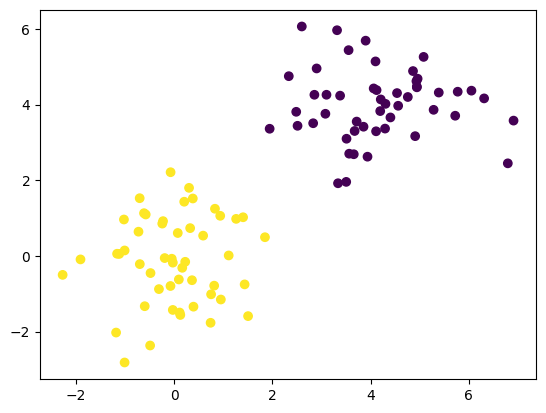

In [96]:
import numpy as np

X1 = np.random.randn(50, 2) + np.array([0, 0])
X2 = np.random.randn(50, 2) + np.array([4, 4])

X = np.vstack((X1, X2))

y = np.hstack((np.ones(50), -np.ones(50)))

plt.scatter(X[:, 0], X[:, 1], c=y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [98]:
svm = SVM()
svm.fit(X_train, y_train)

In [99]:
y_pred = svm.predict(X_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred, squared=False))
print(svm.score(X_test, y_test))

0.0
1.0


# Homework 1

<img src="svm.png">

Try to generate datasets like this, fit SVM on each of them and find best regularization parameter and best kernel for each (use CV).

Dataset settings
- 2 features
- not more than 10k points
- you can either try generating from distributions, and maybe removing some elements after 
- or you can just generate by some functions, this would be easier, but it is OK

# Homework 2

Write a function is_kernel_function(func), which will return True f given function is a kernel function and False if it is not.

In [100]:
def is_kernel_function(func):
    # check on 100 - 1000 data items
    # semi positiveness check by hand
    # kernel function check by hand
    return True

    #
    return False